<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_celeste@4x.png?raw=true" alt="esquema" />
</div>

Este conjunto de datos emula información sobre las visitas de los usuarios a un sitio web minorista imaginario en el Reino Unido. Los usuarios se dividen en dos grupos, A y B, cada uno de los cuales representa un grupo de control y un grupo de tratamiento, respectivamente. En este escenario, se asigna el color "Blanco" al Grupo A, que es la configuración predeterminada para el color de fondo del sitio web y representa el grupo de control. Además, se asigna el color "Negro" al Grupo B, que es la configuración más reciente que se probará y representa al grupo de tratamiento.
 
- La descripción de las columnas es la siguiente:
 
- ID de usuario : sirve como identificador para cada usuario.

- Grupo : Contiene tanto el grupo de control (A) como el grupo de tratamiento (B).

- Páginas vistas : Número de páginas que el usuario vio durante su sesión.

- Tiempo empleado : la cantidad total de tiempo, en segundos, que el usuario pasó en el sitio durante la sesión.

- Conversión : Indica si un usuario ha completado una acción deseada (Sí/No).

- Dispositivo : Tipo de dispositivo utilizado para acceder al sitio web.

- Ubicación : el país del Reino Unido donde se encuentra el usuario.

# Pregunta de investigación
 
¿Los usuarios compran más en un sitio web si el color de fondo es blanco o negro ?
 
# Objetivo final
 
Aumentar las conversiones del sitio web. El usuario completa la acción deseada. 

La métrica principal sería la tasa de conversión, que representa el porcentaje de usuarios que realizan una acción deseada en la página de inicio, en este caso hacer una compra. Se compararía la tasa de conversión entre el grupo de control (diseño original) y el grupo de test (nuevo diseño).
 
Actualmente tenemos una tasa de conversión del 5%, el objetivo es llegar a un 8%. 
 
# Hipótesis
 
- **$H_0$**: La nueva versión del sitio web no es mejor o incluso es peor que la versión anterior.

- **$H_1$**: La nueva versión del sitio web es mejor que la versión anterior.

# Dividir a los usuarios en control y test
 
- **Cambios en la página de inicio del sitio web:** Se dividen a los usuarios en dos grupos: el grupo de control, que experimentaría el diseño predeterminado de la página de inicio (color blanco), y el grupo de test, que experimentaría el nuevo diseño (color negro). Luego, se comparan las conversiones entre ambos grupos para determinar si el nuevo diseño tiene un impacto significativo. La proporción de la división es 50/50 para que se pueda equilibrar la eficiencia de la prueba y la validez de los resultados. 

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Calcular el tamaño muestral
# -----------------------------------------------------------------------
from statsmodels.stats.power import NormalIndPower
import statsmodels.stats.api as sms


# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# Importamos las funciones del archivo de soporte
# ------------------------------------------------------------------------------
from src import soporte_abtesting as sa


# Otros recursos
# ------------------------------------------------------------------------------
import math

# Configuración de las gráficas
# ------------------------------------------------------------------------------
# establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_style("dark")

# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
sns.set_theme(style="dark")

# establece el estilo en seaborn-v0_8-darkgrid. 
plt.style.use('dark_background')

In [2]:
# cargamos el conjunto de datos
df = pd.read_csv("data/ab_testing.csv" , sep=",", encoding="utf-8")
df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   object
 5   Device      5000 non-null   object
 6   Location    5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


In [4]:
import src.soporte_abtesting as sa
print(dir(sa))

['Asunciones', 'Pruebas_no_parametricas', 'Pruebas_parametricas', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'display', 'exploracion_dataframe', 'np', 'pd', 'proportions_ztest', 'stats']


In [5]:
# Hacemos uso de una de nuestras funciones de soporte
sa.exploracion_dataframe(df, "Group")

El número de datos es 5000 y el de columnas es 7

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
User ID,int64
Group,object
Page Views,int64
Time Spent,int64
Conversion,object
Device,object
Location,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna GROUP tiene las siguientes valore únicos:


,count
Group,
A,2519
B,2481


La columna CONVERSION tiene las siguientes valore únicos:


,count
Conversion,
No,4515
Yes,485


La columna DEVICE tiene las siguientes valore únicos:


,count
Device,
Desktop,2538
Mobile,2462


La columna LOCATION tiene las siguientes valore únicos:


,count
Location,
Scotland,1281
England,1246
Northern Ireland,1242
Wales,1231



 ..................... 

Los principales estadísticos de las columnas categóricas para el B son: 


,count,unique,top,freq
Group,2481,1,B,2481
Conversion,2481,2,No,2132
Device,2481,2,Desktop,1294
Location,2481,4,England,640



 ..................... 

Los principales estadísticos de las columnas numéricas para el B son: 


,count,mean,std,min,25%,50%,75%,max
User ID,2481.0,14875.678356,2880.104515,10005.0,12367.0,14815.0,17309.0,19993.0
Page Views,2481.0,7.492946,3.963448,1.0,4.0,8.0,11.0,14.0
Time Spent,2481.0,243.303910,119.193552,40.0,136.0,244.0,348.0,449.0



 ..................... 

Los principales estadísticos de las columnas categóricas para el A son: 


,count,unique,top,freq
Group,2519,1,A,2519
Conversion,2519,2,No,2383
Device,2519,2,Mobile,1275
Location,2519,4,Scotland,670



 ..................... 

Los principales estadísticos de las columnas numéricas para el A son: 


,count,mean,std,min,25%,50%,75%,max
User ID,2519.0,14973.893212,2858.061548,10001.0,12540.5,14902.0,17451.0,19995.0
Page Views,2519.0,7.581580,4.080066,1.0,4.0,8.0,11.0,14.0
Time Spent,2519.0,241.733227,117.340026,40.0,137.5,241.0,343.0,449.0


In [6]:
# En la exploración anterior hemos visto que no hay duplicados, pero podría interesarnos mirar si hay algun usuario que esté más de una vez en el conjunto de datos
print(f"Tenemos un total de {df.duplicated(subset='User ID').sum()} usuarios repetidos")

# como tenemos muchos datos y muy pocos usuarios duplicados lo que vamos a hacer es eliminarlos
df.drop_duplicates(subset="User ID", inplace = True)

Tenemos un total de 0 usuarios repetidos


In [7]:
# Crear una nueva columna llamada "Converted" en la que se conviertan los valores de la columna "Conversion" a booleanos.
 
df['Converted'] = df['Conversion'].map({'Yes': True, 'No': False}).astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   object
 5   Device      5000 non-null   object
 6   Location    5000 non-null   object
 7   Converted   5000 non-null   bool  
dtypes: bool(1), int64(3), object(4)
memory usage: 278.4+ KB


Para calcular el tamaño muestral, es necesario calcular para el grupo A el promedio de compras que han hecho los usuarios y luego podremos establecer el objetivo de en cuánto debe aumentar ese promedio.

In [8]:
# Promedio de conversión para el grupo A
promedio_por_grupo = df[df['Group'] == "A"] ['Converted'].mean().round(2)

promedio_por_grupo


np.float64(0.05)

Con el grupo A se logra un promedio del 0.05 (tasa de conversión del 5%) por cada usuario en cada sesión. El objetivo es aumentar la tasa de conversión a un 8%.

In [9]:
# calculamos la diferencia esperada entre las tasas de conversión del diseño viejo y el nuevo, que es una medida estandarizada de la diferencia entre dos proporciones.
diferencia = sms.proportion_effectsize(0.05, 0.08)  

# definimos una variable para establecer el nivel de significancia
alpha = 0.05 

# definimos una variable para establecer el la potencia deseada
power = 0.80 

# usamos el método NormalIndPower, para poder aplicar la fórmula que hemos aprendido
analisis = NormalIndPower()

# aplicamos el método 'solve_power' para calcular el tamaño muestral. Este método no hace otra cosa más que aplicar la fórmula que vimos previamente
tamaño_muestral = analisis.solve_power(diferencia, power = power, nobs1= None, ratio = 1.0, alpha = alpha)
print(f'El tamaño muestral debe de ser de: {math.ceil(tamaño_muestral)}')

El tamaño muestral debe de ser de: 1047


In [10]:
# Seleccionar 1047 usuarios de cada grupo

# seleccionamos 1047 usuarios de cada grupo de forma aleatoria
grupo_control = df[df['Group'] == 'A'].sample(n=math.ceil(tamaño_muestral), random_state=22)
grupo_test = df[df['Group'] == 'B'].sample(n=math.ceil(tamaño_muestral), random_state=22)

# unimos los dos conjuntos de datos
ab_test = pd.concat([grupo_control, grupo_test], axis=0).reset_index(drop = True)

# comprobamos que tengamos el mismo número de usuarios en los 2 grupos
ab_test["Group"].value_counts()

Group
A    1047
B    1047
Name: count, dtype: int64

,Group,mean,std
0,A,5.348615,22.510838
1,B,14.422159,35.148217


Text(0.5, 0, '')

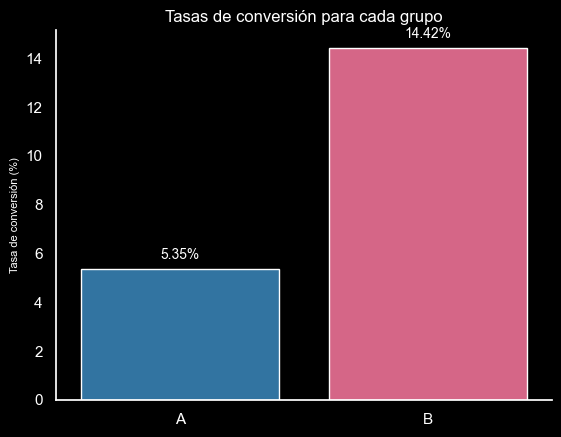

In [11]:
# Vamos a empezar con algunas gráficas para ir familiarizándonos con los datos.
# Lo primero que vamos a hacer es calcular el ratio de conversión de cada uno de los grupos.

ratio_conversion = ab_test.groupby('Group')['Converted'].agg(["mean", "std"]).reset_index()
ratio_conversion['mean'] *= 100  # Convertimos a porcentaje
ratio_conversion['std'] *= 100   # También por si luego usas barras de error

display(ratio_conversion)

# Crear gráfico con seaborn y colores personalizados
fig = sns.barplot(
    data=ratio_conversion, 
    x="Group", 
    y="mean",
    hue="Group",
    palette={"A": "#1f77b4", "B": "#e75480"},
    legend=False
)

# Añadir etiquetas de porcentaje arriba de las barras
for container in fig.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            fig.text(
                x=bar.get_x() + bar.get_width() / 2,
                y=height + 0.3,  # un poco más arriba que antes, porque ahora la escala es 0–100
                s=f"{height:.2f}%",
                ha='center',
                va='bottom',
                fontsize=10
            )

# Estética del gráfico
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_title("Tasas de conversión para cada grupo")
fig.set_ylabel("Tasa de conversión (%)", fontsize=8)
fig.set_xlabel("")

Estos resultados muestran las medias en las tasas de conversión para los dos grupos: el grupo de control y el grupo de tratamiento.

- Para el grupo de control, la tasa de conversión promedio es aproximadamente 5.35%, con una desviación estándar de alrededor de 22.51%.

- Para el grupo de tratamiento, la tasa de conversión promedio es aproximadamente 14.42%, con una desviación estándar de alrededor de 35.14%.

Esto sugiere que, en promedio, el grupo de tratamiento tiene una tasa de conversión más alta que el grupo de control, en concreto un 9.07% más. Sin embargo, las desviaciones estándar muestran que hay más variabilidad en los datos del grupo de tratamiento en comparación con el grupo de control.


Las desviaciones estándar más grandes en el grupo de tratamiento en comparación con el grupo de control indican una mayor variabilidad en los datos del grupo de tratamiento. El principal problema que nos podríamos encontrar es que una mayor variabilidad en el grupo de tratamiento podría llevar a una mayor incertidumbre sobre la verdadera efectividad del nuevo diseño. De esta forma, podriamos tener unos resultados menos confiables y más difíciles de interpretar.

,Location,mean,std
3,Wales,11.800000,32.293121
2,Scotland,9.671533,29.583979
0,England,9.108527,28.800955
1,Northern Ireland,9.056604,28.726212


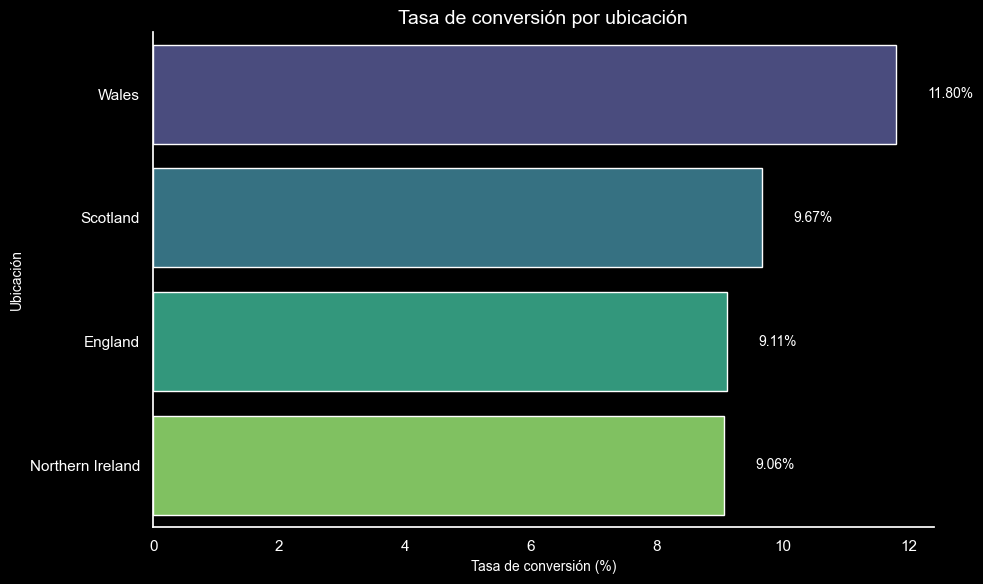

In [12]:
# Agrupar y calcular tasa de conversión por Location
conversion_location = ab_test.groupby('Location')['Converted'].agg(["mean", "std"]).reset_index()
conversion_location['mean'] *= 100  # Convertimos a porcentaje
conversion_location['std'] *= 100   # También por si luego usamos barras de error
conversion_location = conversion_location.sort_values('mean', ascending=False)

display(conversion_location)

# Crear gráfico 
plt.figure(figsize=(10, 6))

fig = sns.barplot(
    data=conversion_location,
    x="mean",
    y="Location",
    hue="Location",             # <- esto evita el warning
    palette="viridis",
    legend=False                # <- y desactivamos la leyenda innecesaria
)

# Añadir etiquetas al final de cada barra
for container in fig.containers:
    for bar in container:
        width = bar.get_width()
        if width > 0:
            fig.text(
                x=width + 0.5,
                y=bar.get_y() + bar.get_height() / 2,
                s=f"{width:.2f}%",
                va='center',
                ha='left',
                fontsize=10
            )

# Estética
fig.set_title("Tasa de conversión por ubicación", fontsize=14)
fig.set_xlabel("Tasa de conversión (%)", fontsize=10)
fig.set_ylabel("Ubicación", fontsize=10)
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
plt.tight_layout()
plt.show()

Estos resultados muestran las medias en las tasas de conversión para los países que forman parte de Reino Unido: Gales, Escocia, Inglaterra y Norte de Irlanda. 

- Para Gales, la tasa de conversión promedio es aproximadamente 11.80%, con una desviación estándar de alrededor de 32.29%.

- Para Escocia, la tasa de conversión promedio es aproximadamente 9.67%, con una desviación estándar de alrededor de 29.58%.

- Para Inglaterra, la tasa de conversión promedio es aproximadamente 9.11%, con una desviación estándar de 28.80%.
 
- Para el Norte de Irlanda, la tasa de conversión promedio es aproximadamente 9.06%, con una desviación estándar de 28.73%.

Esto sugiere que, en promedio, Gales tiene una tasa de conversión más alta que las demás localizaciones, en torno a un 2% más. Sin embargo, las desviaciones estándar muestran que hay más variabilidad en los datos para Gales en comparación con los demás países.


Las desviaciones estándar más grandes en Gales en comparación con las demás localizaciones indican una mayor variabilidad en los datos del grupo de tratamiento. El principal problema que nos podríamos encontrar es que una mayor variabilidad en el grupo de tratamiento podría llevar a una mayor incertidumbre sobre la verdadera efectividad del nuevo diseño. De esta forma, podriamos tener unos resultados menos confiables y más difíciles de interpretar.

In [13]:
# Prueba de t-Student para comparar si existen diferencias significativas entre el grupo de control y el de tratamiento
from scipy.stats import t

# Separar los datos por grupo
grupo_a = df[df['Group'] == 'A']['Converted']
grupo_b = df[df['Group'] == 'B']['Converted']

# Calcular medias
x1 = np.mean(grupo_a)
x2 = np.mean(grupo_b)

# Calcular varianzas muestrales y tamaños
s1_sq = np.var(grupo_a, ddof=1)
s2_sq = np.var(grupo_b, ddof=1)
n1 = len(grupo_a)
n2 = len(grupo_b)

# Calcular t-statistic
t_stat = (x1 - x2) / np.sqrt((s1_sq / n1) + (s2_sq / n2))

# Grados de libertad (fórmula de Welch)
df_grados = ((s1_sq/n1 + s2_sq/n2)**2) / (((s1_sq/n1)**2) / (n1 - 1) + ((s2_sq/n2)**2) / (n2 - 1))

# p-valor (dos colas)
p_valor = 2 * t.sf(np.abs(t_stat), df_grados)

# Resultados
{
    "Media grupo A": round(x1, 4),
    "Media grupo B": round(x2, 4),
    "t-statistic": round(t_stat, 4),
    "p-valor": round(p_valor, 4),
    "Grados de libertad": round(df_grados, 2),
    "Conclusión": "✅ Diferencia significativa" if p_valor < 0.05 else "❌ No significativa"
}



{'Media grupo A': np.float64(0.054),
 'Media grupo B': np.float64(0.1407),
 't-statistic': np.float64(-10.433),
 'p-valor': np.float64(0.0),
 'Grados de libertad': np.float64(4248.85),
 'Conclusión': '✅ Diferencia significativa'}

In [14]:
from scipy.stats import shapiro

# Comprobar normalidad para cada grupo
stat_a, p_a = shapiro(grupo_a)
stat_b, p_b = shapiro(grupo_b)

print("Grupo A - p valor Shapiro:", round(p_a, 4))
print("Grupo B - p valor Shapiro:", round(p_b, 4))

Grupo A - p valor Shapiro: 0.0
Grupo B - p valor Shapiro: 0.0


La distribución de cada grupo sigue una distribución normal porque p valor es < 0.05 y por tanto se acepta la hipótesis nula

In [15]:
from scipy.stats import levene

# Comprobar la homocedasticidad de los grupos
stat_levene, p_levene = levene(grupo_a, grupo_b)

print("Levene test - p valor:", round(p_levene, 4))

Levene test - p valor: 0.0


La diferencia entre los valores del grupo de control y el grupo de tratamiento son similares, p valor < 0.05 se acepta la hipótesis nula. 

In [16]:
# Prueba Z-test para comparar la tasa de conversión entre los dos grupos y ver si hay diferencias significativas

# instanciamos la clase de los métodos estadísticos
ab_testing = sa.Pruebas_parametricas("Group",  "Converted", ab_test, "B", "A")
ab_testing.z_test()

El estadístico de prueba (Z) es: -6.96, el p-valor es 0.0
El p-valor de la prueba es 0.0, por lo tanto, hay diferencias significativas entre los grupos.


,Group,mean,std
0,A,5.348615,22.510838
1,B,14.422159,35.148217


Text(0.5, 0, '')

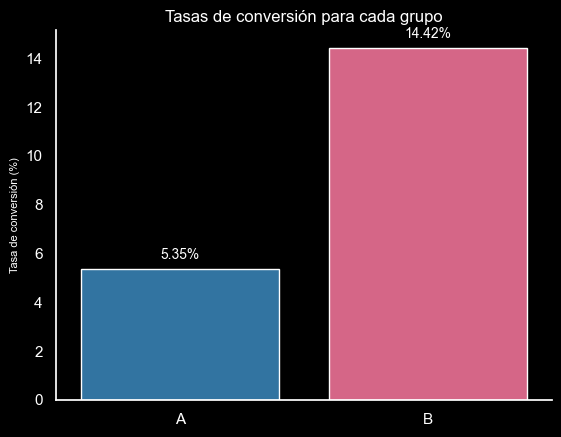

In [18]:
# hemos visto que hay diferencias, recordemos ahora la gráfica donde veíamos las tasas de conversión de cada uno de los grupos
ratio_conversion = ab_test.groupby('Group')['Converted'].agg(["mean", "std"]).reset_index()
ratio_conversion['mean'] *= 100  # Convertimos a porcentaje
ratio_conversion['std'] *= 100   # También por si luego usas barras de error

display(ratio_conversion)

# Crear gráfico con seaborn y colores personalizados
fig = sns.barplot(
    data=ratio_conversion, 
    x="Group", 
    y="mean",
    hue="Group",
    palette={"A": "#1f77b4", "B": "#e75480"},
    legend=False
)

# Añadir etiquetas de porcentaje arriba de las barras
for container in fig.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            fig.text(
                x=bar.get_x() + bar.get_width() / 2,
                y=height + 0.3,  # un poco más arriba que antes, porque ahora la escala es 0–100
                s=f"{height:.2f}%",
                ha='center',
                va='bottom',
                fontsize=10
            )

# Estética del gráfico
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_title("Tasas de conversión para cada grupo")
fig.set_ylabel("Tasa de conversión (%)", fontsize=8)
fig.set_xlabel("")


# Conclusión
 
Tanto en la prueba T-Student como en la prueba Z-Test se ha visto que el p valor es < 0.05, por lo que existen diferencias significativas entre el grupo de control y el grupo de tratamiento. Lo que realmente significa es que aumentan las conversiones de compra en el sitio web cuando el fondo es de color negro. Hemos logrado el objetivo final porque se ha alcanzado una tasa de conversión del 14.42%. Rechazamos la hipótesis nula y aceptamos la alternativa porque la nueva versión del sitio web es mucho mejor que la anterior. 